# Analysis of a Fingerprints Database

## Libraries Import

In [1]:
from enum import Enum

import pandas as pd
import matplotlib.pyplot as pyplot
import numpy as np
import seaborn as sns
from matplotlib.image import imread
from PIL import Image

## Configuration

In [2]:
SCAN_IMAGE_FORMAT = "datasets/fvc2002/DB{}_B/1{:02d}_{}.tif"
PERSONS_IN_DATASET = 4
FINGERS_PER_PERSONS = 10
SCANS_PER_FINGER = 8
FIRST_FINGERS_COUNT = 4
PLOT_SCALE_FACTOR = 5
STATISTICS_COLUMNS = ["full_path", "person_id", "finger_id", "scan_id", "minimum", "maximum", "mean", "standard_deviation"]
RANDOM_SCANS_TO_SELECT = 3

## Displaying the Scans of the Same Finger

In [3]:
def display_image(filename: str, title: str = None) -> None:
    image = Image.open(filename)

    pyplot.figure()
    pyplot.title(title)
    pyplot.imshow(image, cmap="gray")
    pyplot.axis("off")
    pyplot.show()

In [4]:
def display_finger(person_id: int, finger_id: int) -> None:
    print("The scans for the finger #{} of the person #{} are listed below.\n".format(person_id, finger_id))

    for i in range(SCANS_PER_FINGER):
        filename = SCAN_IMAGE_FORMAT.format(person_id, finger_id, i + 1)
        caption = "Scan #{}".format(i + 1)

        display_image(filename, caption)

The scans for the finger #1 of the person #1 are listed below.



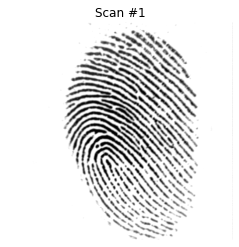

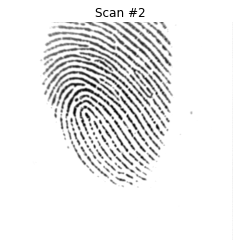

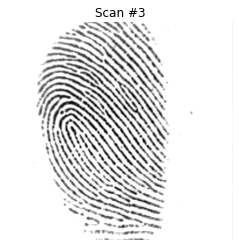

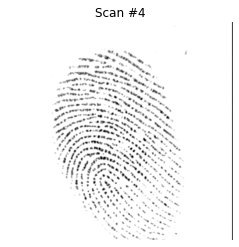

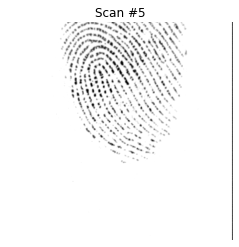

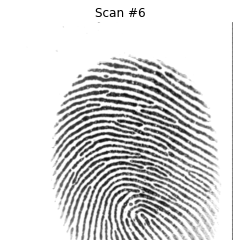

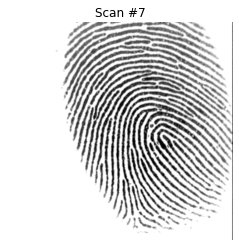

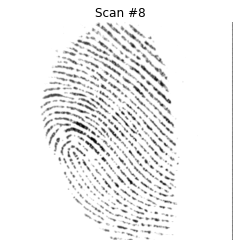

In [5]:
display_finger(1, 1)

## Displaying a Person's Fingers

In [6]:
def display_first_fingers(person_id: int) -> None:
    print("The first scan for the first {} fingers of the person #{} are listed below.\n".format(FIRST_FINGERS_COUNT, person_id))

    for i in range(FIRST_FINGERS_COUNT):
        full_path = SCAN_IMAGE_FORMAT.format(person_id, i + 1, 1)
        caption = "Finger #{}".format(i + 1)
        
        display_image(full_path, caption)

The first scan for the first 4 fingers of the person #1 are listed below.



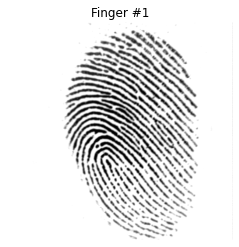

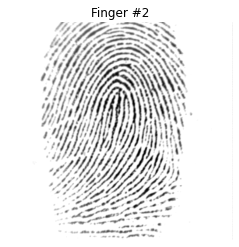

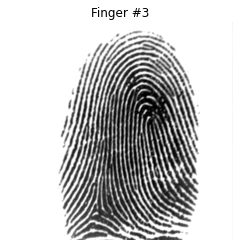

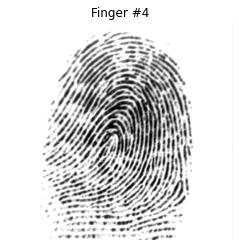

In [7]:
display_first_fingers(1)

## Statistics About the Scans from the Dataset

In [8]:
statistics_data = []
for person_id in range(1, PERSONS_IN_DATASET + 1):
    for finger_id in range(1, FINGERS_PER_PERSONS + 1):
        for scan_id in range(1, SCANS_PER_FINGER + 1):
            full_path = SCAN_IMAGE_FORMAT.format(person_id, finger_id, scan_id)
            pixels = imread(full_path)[:, :]

            pixels_array = np.array(pixels)
            minimum = pixels_array.min()
            maximum = pixels_array.max()
            mean = pixels_array.mean()
            standard_deviation = pixels_array.std()

            statistics_data.append((full_path, person_id, finger_id, scan_id, minimum, maximum, mean, standard_deviation))

In [9]:
statistics_df = pd.DataFrame(statistics_data, columns=STATISTICS_COLUMNS)
print("The statistical informations obtained for the dataset are:\n\n{}".format(statistics_df))

The statistical informations obtained for the dataset are:

                            full_path  person_id  finger_id  scan_id  minimum  \
0    datasets/fvc2002/DB1_B/101_1.tif          1          1        1        1   
1    datasets/fvc2002/DB1_B/101_2.tif          1          1        2        1   
2    datasets/fvc2002/DB1_B/101_3.tif          1          1        3        1   
3    datasets/fvc2002/DB1_B/101_4.tif          1          1        4        1   
4    datasets/fvc2002/DB1_B/101_5.tif          1          1        5        1   
..                                ...        ...        ...      ...      ...   
315  datasets/fvc2002/DB4_B/110_4.tif          4         10        4        0   
316  datasets/fvc2002/DB4_B/110_5.tif          4         10        5       25   
317  datasets/fvc2002/DB4_B/110_6.tif          4         10        6        0   
318  datasets/fvc2002/DB4_B/110_7.tif          4         10        7        0   
319  datasets/fvc2002/DB4_B/110_8.tif          4 

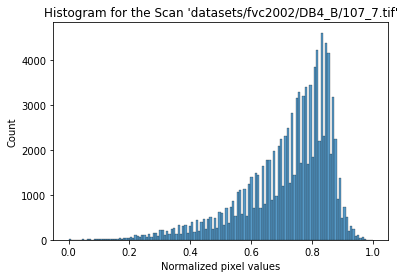

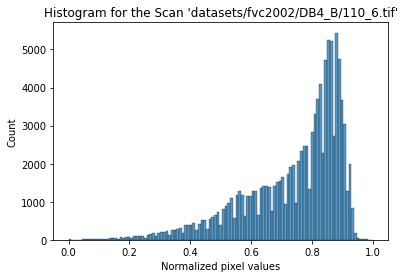

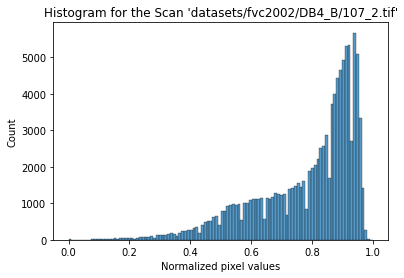

In [10]:
random_samples = statistics_df.sample(RANDOM_SCANS_TO_SELECT)
for _, sample in random_samples.iterrows():
    full_path = sample["full_path"]
    pixels = imread(full_path)[:, :]
    pixels_array = np.array(pixels)

    # Normalize the pixels
    minimum = pixels_array.min()
    maximum = pixels_array.max()
    pixels_array = (pixels_array - minimum) / (maximum - minimum)
    pixels_list = pixels_array.flatten().tolist()

    # Show the histogram
    pyplot.figure()
    sns.histplot(pixels_list)
    pyplot.title("Histogram for the Scan '{}'".format(full_path))
    pyplot.xlabel("Normalized pixel values")
    pyplot.ylabel("Count")
    pyplot.show()